In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from regression_signal import rolling_regression_trading_signal, rolling_regression_trading_rule, equity_performance
plt.style.use("classic")
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20, 3)

path = "https://github.com/queiyanglim/trading_algorithm/blob/master/oil_trading/data/daily.csv?raw=true"
df_pull = pd.read_csv(path, header=[0,1], index_col = 0)

# Prepare data
brent = df_pull.brent.CLOSE
brent.name = "brent"

wti = df_pull.wti.CLOSE
wti.name = "wti"

df_raw= pd.concat([brent, wti], axis = 1)

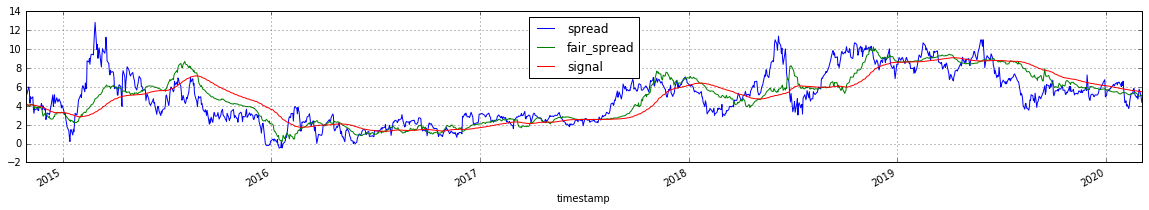

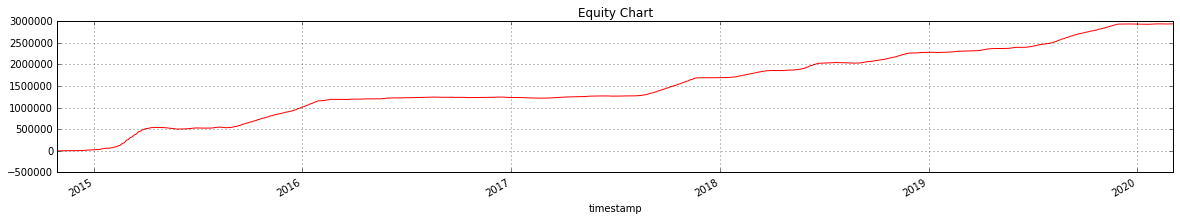

In [19]:
df = df_raw.copy()
df = df.dropna()

#load signals
df_signal = rolling_regression_trading_signal(df_input=df, 
                                              X_name= "wti", 
                                              y_name = "brent", 
                                              update_window=120,
                                              ewm_span=60)
# Refresh timestamp format
df_signal.index = pd.to_datetime(df_signal.index, format = "%Y-%m-%d")
df_signal[["spread", "fair_spread", "signal"]].plot(figsize=(20,3), grid = True)
plt.show()

# Create trading rule based on signal
pos = pd.DataFrame(rolling_regression_trading_rule(df_signal)).set_index("timestamp")
df_pos = pd.concat([df_signal, pos], axis =1)

# Equity performance
df_equity = equity_performance(df_pos, X_name = "wti", y_name = "brent")
df_equity.equity.cumsum().plot(figsize = (20,3), grid= True, title= "Equity Chart", color ="red")
plt.show()